In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, RandomizedSearchCV
from sklearn import preprocessing
from sklearn.metrics import r2_score, accuracy_score, roc_auc_score, mean_squared_error

### working stages:

#### 1) load the data

#### 2) clean the data

#### 3) explore the data

#### 4) handle null values

#### 5) feature engeneering

#### 6) model comparison

#### 7) model selection

#### 8) tuning the model

#### note: part 2-3-4 may often come in a different order, depends on the data.

In [2]:
emp_data = pd.read_csv('employee_survey_data.csv', index_col='EmployeeID')
gen_data = pd.read_csv('general_data.csv',index_col='EmployeeID')
manager_data = pd.read_csv('manager_survey_data.csv',index_col='EmployeeID')
in_time_data = pd.read_csv('in_time.csv')
out_time_data = pd.read_csv('out_time.csv')


In [3]:
in_time_data.rename(columns={'Unnamed: 0':'EmployeeID'}, inplace=True)
in_time_data.set_index('EmployeeID', inplace=True)
in_time_data
out_time_data.rename(columns={'Unnamed: 0':'EmployeeID'}, inplace=True)
out_time_data.set_index('EmployeeID', inplace=True)
out_time_data.head()

,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,NaN,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,NaN,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,NaN,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,NaN,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
5,NaN,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,NaN,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


In [4]:
in_time_data = in_time_data.apply(pd.DatetimeIndex)
out_time_data = out_time_data.apply(pd.DatetimeIndex)

In [5]:
times = pd.concat([in_time_data, out_time_data], axis=1)

In [6]:
times.head()

,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,NaT,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,NaT,...,NaT,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaT,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
2,NaT,2015-01-02 10:15:44,2015-01-05 10:21:05,NaT,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,NaT,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaT,NaT,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
3,NaT,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,NaT,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaT,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
4,NaT,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,NaT,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaT,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
5,NaT,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,NaT,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaT,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


In [7]:
times = times.applymap(lambda x: x.hour+0.01*x.minute)
times['avg_in'] = round(times.iloc[:, :261].mean(axis=1),2)
times['avg_out'] = round(times.iloc[:, 261:].mean(axis=1),2)
times['med_in'] = round(times.iloc[:, :261].median(axis=1),2)
times['med_out'] = round(times.iloc[:, 261:].median(axis=1),2)

In [8]:
times.head()

,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,...,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31,avg_in,avg_out,med_in,med_out
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,NaN,9.43,10.08,9.54,9.34,9.51,10.09,9.42,10.13,NaN,...,17.47,NaN,18.00,17.22,17.40,17.17,9.79,17.15,9.59,17.23
2,NaN,10.15,10.21,NaN,9.45,10.09,9.43,10.00,10.43,NaN,...,NaN,NaN,17.08,17.54,18.31,17.40,9.78,17.47,9.58,17.43
3,NaN,10.17,9.50,10.14,9.47,10.03,10.05,10.03,10.21,NaN,...,16.58,NaN,16.43,17.09,17.06,17.15,9.83,16.80,10.02,17.01
4,NaN,10.05,9.56,10.11,9.37,10.02,10.08,10.13,9.53,NaN,...,16.48,NaN,17.19,16.58,17.40,17.09,9.77,16.95,9.58,17.11
5,NaN,10.28,9.49,9.45,9.49,10.19,10.00,10.29,9.59,NaN,...,17.59,NaN,17.44,18.47,17.15,17.42,9.78,17.77,9.58,17.59


In [9]:
times.shape

(4410, 526)

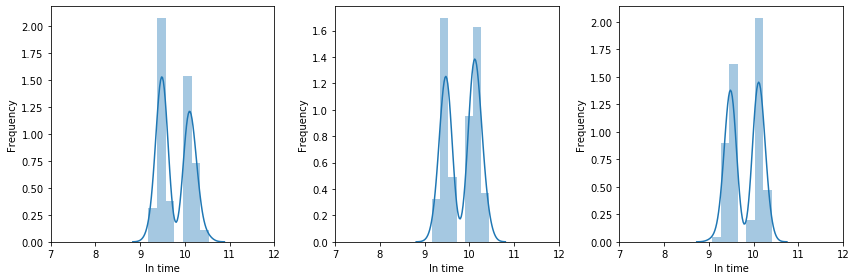

In [10]:
fig, axs = plt.subplots(1,3, figsize = (12,4))
sns.distplot(times.iloc[4, :261], ax=axs[0]).set(xlabel = 'In time', ylabel = 'Frequency',xlim=(7,12))
sns.distplot(times.iloc[72, :261], ax=axs[1]).set(xlabel = 'In time', ylabel = 'Frequency',xlim=(7,12))
sns.distplot(times.iloc[102, :261], ax=axs[2]).set(xlabel = 'In time', ylabel = 'Frequency',xlim=(7,12))
plt.tight_layout()


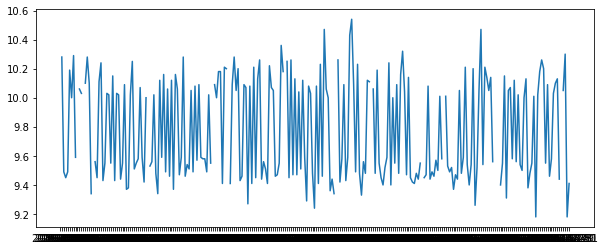

In [11]:
plt.figure(figsize=(10,4))
g = plt.plot(times.iloc[4, :261])


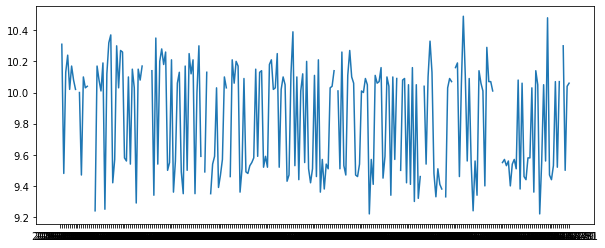

In [12]:
plt.figure(figsize=(10,4))
g = plt.plot(times.iloc[25, :261])


In [13]:
times['total'] = times['med_out'] - times['med_in']
time_feats = times[['avg_in', 'avg_out', 'med_in','med_out','total']]

In [14]:
time_feats.head()

,avg_in,avg_out,med_in,med_out,total
EmployeeID,,,,,
1,9.79,17.15,9.59,17.23,7.64
2,9.78,17.47,9.58,17.43,7.85
3,9.83,16.80,10.02,17.01,6.99
4,9.77,16.95,9.58,17.11,7.53
5,9.78,17.77,9.58,17.59,8.01


In [15]:
in_time_data.isna().sum()

2015-01-01    4410
2015-01-02     209
2015-01-05     206
2015-01-06     228
2015-01-07     209
              ... 
2015-12-25    4410
2015-12-28     234
2015-12-29     230
2015-12-30     265
2015-12-31     213
Length: 261, dtype: int64

In [16]:
emp_data.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
EmployeeID,,,
1,3.0,4.0,2.0
2,3.0,2.0,4.0
3,2.0,2.0,1.0
4,4.0,4.0,3.0
5,4.0,1.0,3.0


In [17]:
manager_data.isna().sum()

JobInvolvement       0
PerformanceRating    0
dtype: int64

In [18]:
emp_data.loc[emp_data['EnvironmentSatisfaction'].isnull()]


,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
EmployeeID,,,
12,NaN,4.0,3.0
112,NaN,2.0,3.0
196,NaN,3.0,2.0
301,NaN,4.0,3.0
406,NaN,4.0,2.0
490,NaN,4.0,3.0
679,NaN,2.0,3.0
847,NaN,3.0,2.0
910,NaN,4.0,2.0


- there's some null values, let's explore the data a little bit to see how can can handle it properly</li>


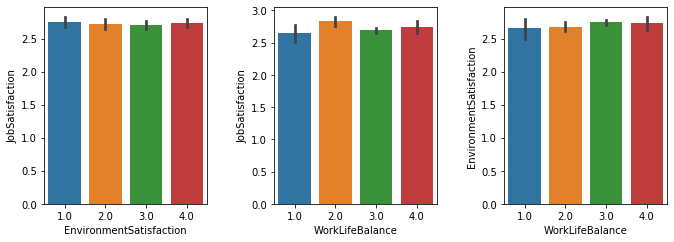

In [19]:
fig, axs = plt.subplots(1,3, figsize=(10,4))
sns.barplot(emp_data['EnvironmentSatisfaction'], emp_data['JobSatisfaction'],ax=axs[0])
sns.barplot(emp_data['WorkLifeBalance'], emp_data['JobSatisfaction'],ax=axs[1])
sns.barplot(emp_data['WorkLifeBalance'], emp_data['EnvironmentSatisfaction'],ax=axs[2])
plt.tight_layout(pad=3)


C:\Users\guy\miniconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


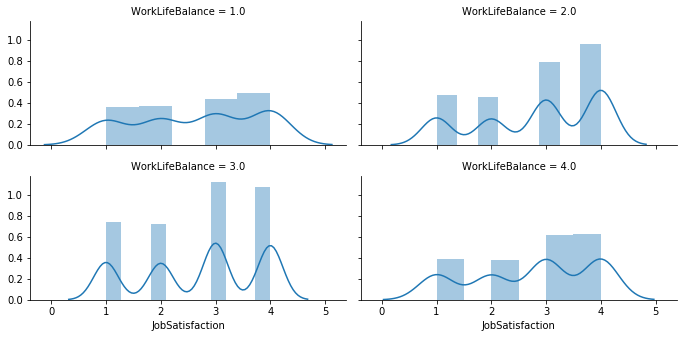

In [20]:
g = sns.FacetGrid(emp_data, col='WorkLifeBalance',size=2.4, aspect=2, col_wrap=2 )
g = g.map(sns.distplot, 'JobSatisfaction', )

C:\Users\guy\miniconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


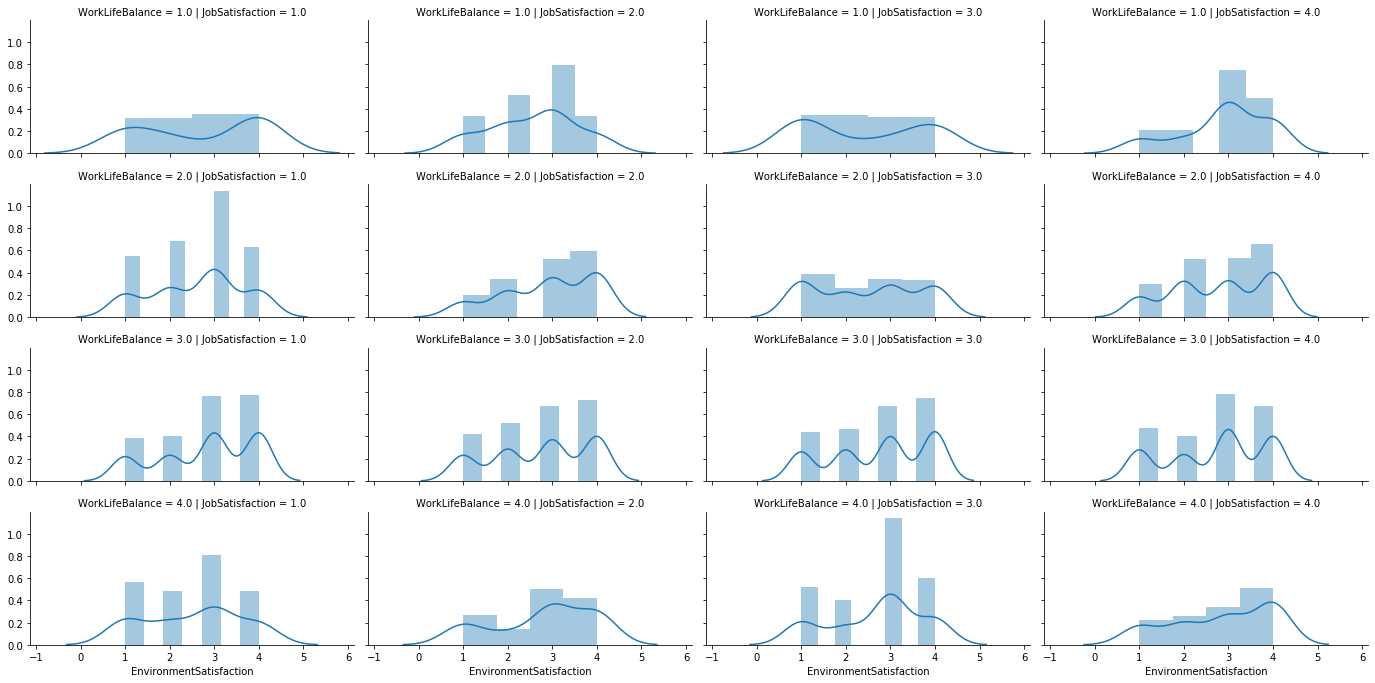

In [21]:
g = sns.FacetGrid(emp_data, col='JobSatisfaction',row ='WorkLifeBalance', size=2.4, aspect=2 )
g = g.map(sns.distplot, 'EnvironmentSatisfaction' )

#### No clear connection between the variables, but in order to be on the safe side, we'll handle the nulls by the conditional mode based on the other two columns

In [22]:
def set_mode(data, col, col2, col3):
    index_nan = list(data[col][data[col].isnull()].index)
    for i in index_nan:
        cols_mode = data[col].mode()[0]
        mode_fill = data[col][((data[col2] == data.loc[i][col2]) & (data[col3] == data.loc[i][col3]))].mode()[0]
        data[col].loc[i] = mode_fill


    
                    

In [23]:
set_mode(emp_data, 'EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance')

In [24]:
emp_data.isnull().sum()

EnvironmentSatisfaction     0
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

In [25]:
set_mode(emp_data, 'JobSatisfaction','EnvironmentSatisfaction','WorkLifeBalance')

In [26]:
emp_data.isnull().sum()

EnvironmentSatisfaction     0
JobSatisfaction             0
WorkLifeBalance            38
dtype: int64

In [27]:
set_mode(emp_data, 'WorkLifeBalance','JobSatisfaction','EnvironmentSatisfaction')

In [28]:
emp_data.isnull().sum()

EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
dtype: int64

In [29]:
gen_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,...,1.0,Y,11,8,0,1.0,6,1,0,0
2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,...,0.0,Y,23,8,1,6.0,3,5,1,4
3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,...,1.0,Y,15,8,3,5.0,2,5,0,3
4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,...,3.0,Y,11,8,3,13.0,5,8,7,5
5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,...,4.0,Y,12,8,2,9.0,2,6,0,4


### Alright, we can now merge the dataframes and explore the data as a whole

In [30]:
df = pd.concat([gen_data,manager_data,emp_data,time_feats], axis=1)

In [31]:
for col in df.columns.values:
    if df[col].nunique() == 1:
        df.drop(col, axis=1, inplace=True)

In [32]:
df['Attrition'] = np.where(df['Attrition']=='Yes',1,0)

In [33]:
df.NumCompaniesWorked.fillna(0, inplace=True)
df.TotalWorkingYears.fillna(0, inplace=True)

In [98]:
df.isna().sum()
df.head()


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,avg_in,avg_out,med_in,med_out,total
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,51,0,1,Sales,6,2,Life Sciences,1,1,Healthcare Representative,...,3,3,3.0,4.0,2.0,9.79,17.15,9.59,17.23,7.64
2,31,1,2,Research & Development,10,1,Life Sciences,1,1,Research Scientist,...,2,4,3.0,2.0,4.0,9.78,17.47,9.58,17.43,7.85
3,32,0,2,Research & Development,17,4,Other,0,4,Sales Executive,...,3,3,2.0,2.0,1.0,9.83,16.80,10.02,17.01,6.99
4,38,0,0,Research & Development,2,5,Life Sciences,0,3,Human Resources,...,2,3,4.0,4.0,3.0,9.77,16.95,9.58,17.11,7.53
5,32,0,1,Research & Development,10,1,Medical,0,1,Sales Executive,...,3,3,4.0,1.0,3.0,9.78,17.77,9.58,17.59,8.01


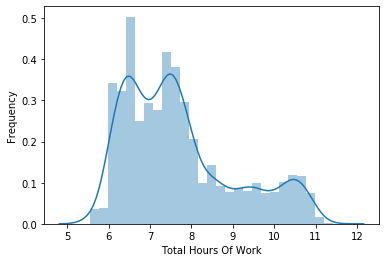

In [99]:
g = sns.distplot(df['total']).set(xlabel = 'Total Hours Of Work', ylabel = 'Frequency')

In [36]:
## checking the exact number of people by hours of work
print(df['total'][df['total'] <=7].value_counts().sum())
print(df['total'][(df['total'] > 7) & (df['total'] <=8)].value_counts().sum())
print(df['total'][df['total'] > 8].value_counts().sum())


1599
1514
1297


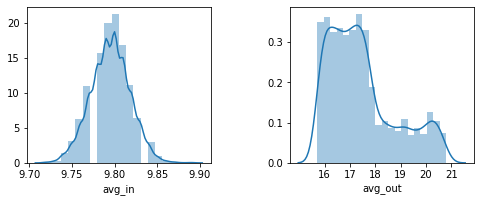

In [37]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.distplot(df['avg_in'], bins=20)
plt.subplot(1,2,2)
s = sns.distplot(df['avg_out'], bins=20)
plt.xticks((range(16,22)))
plt.tight_layout(pad=5)

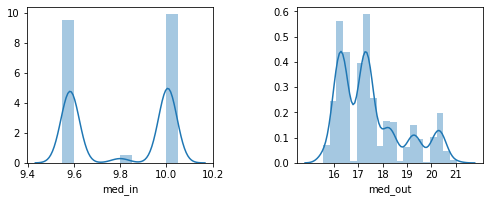

In [38]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.distplot(df['med_in'], bins=10)
plt.subplot(1,2,2)
s = sns.distplot(df['med_out'], bins=20)
plt.xticks((range(16,22)))
plt.tight_layout(pad=5)

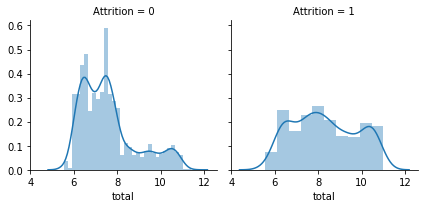

In [40]:
g = sns.FacetGrid(df,col = 'Attrition')
g = g.map(sns.distplot, 'total')

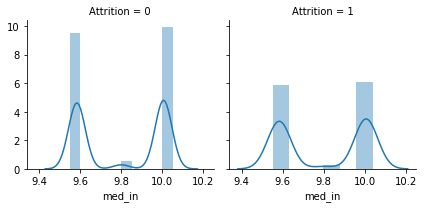

In [41]:
g = sns.FacetGrid(df,col = 'Attrition')
g = g.map(sns.distplot, 'med_in')


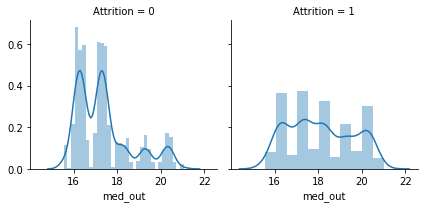

In [42]:
g = sns.FacetGrid(df,col = 'Attrition')
g = g.map(sns.distplot , 'med_out')

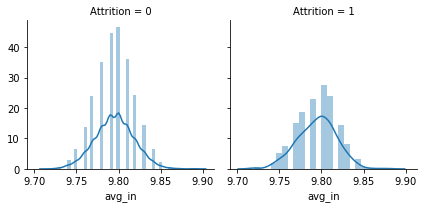

In [43]:
g = sns.FacetGrid(df,col = 'Attrition')
g = g.map(sns.distplot , 'avg_in')

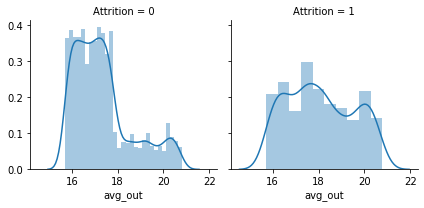

In [44]:
g = sns.FacetGrid(df,col = 'Attrition' )
g = g.map(sns.distplot , 'avg_out')

### both the median and the mean in/out time, as well as the total time, show us that people who work more, but pushing the working hours till late, are more likely to attrit

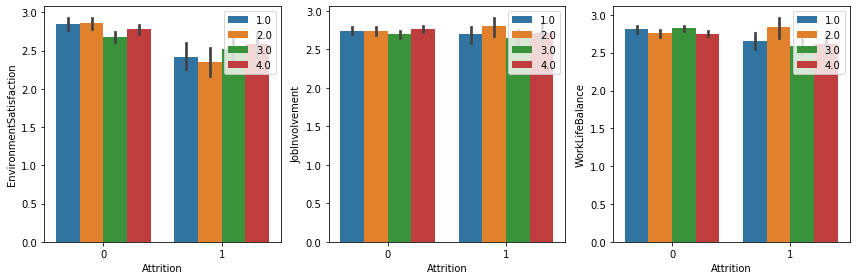

In [45]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
g = sns.barplot(df['Attrition'], df['EnvironmentSatisfaction'], hue=df['JobSatisfaction'])
plt.legend(loc ='upper right')
plt.subplot(1,3,2)
s = sns.barplot(df['Attrition'], df['JobInvolvement'], hue=df['JobSatisfaction'])
plt.legend(loc ='upper right')
plt.subplot(1,3,3)
f = sns.barplot(df['Attrition'], df['WorkLifeBalance'], hue=df['JobSatisfaction'])
plt.legend(loc ='upper right')
plt.tight_layout()

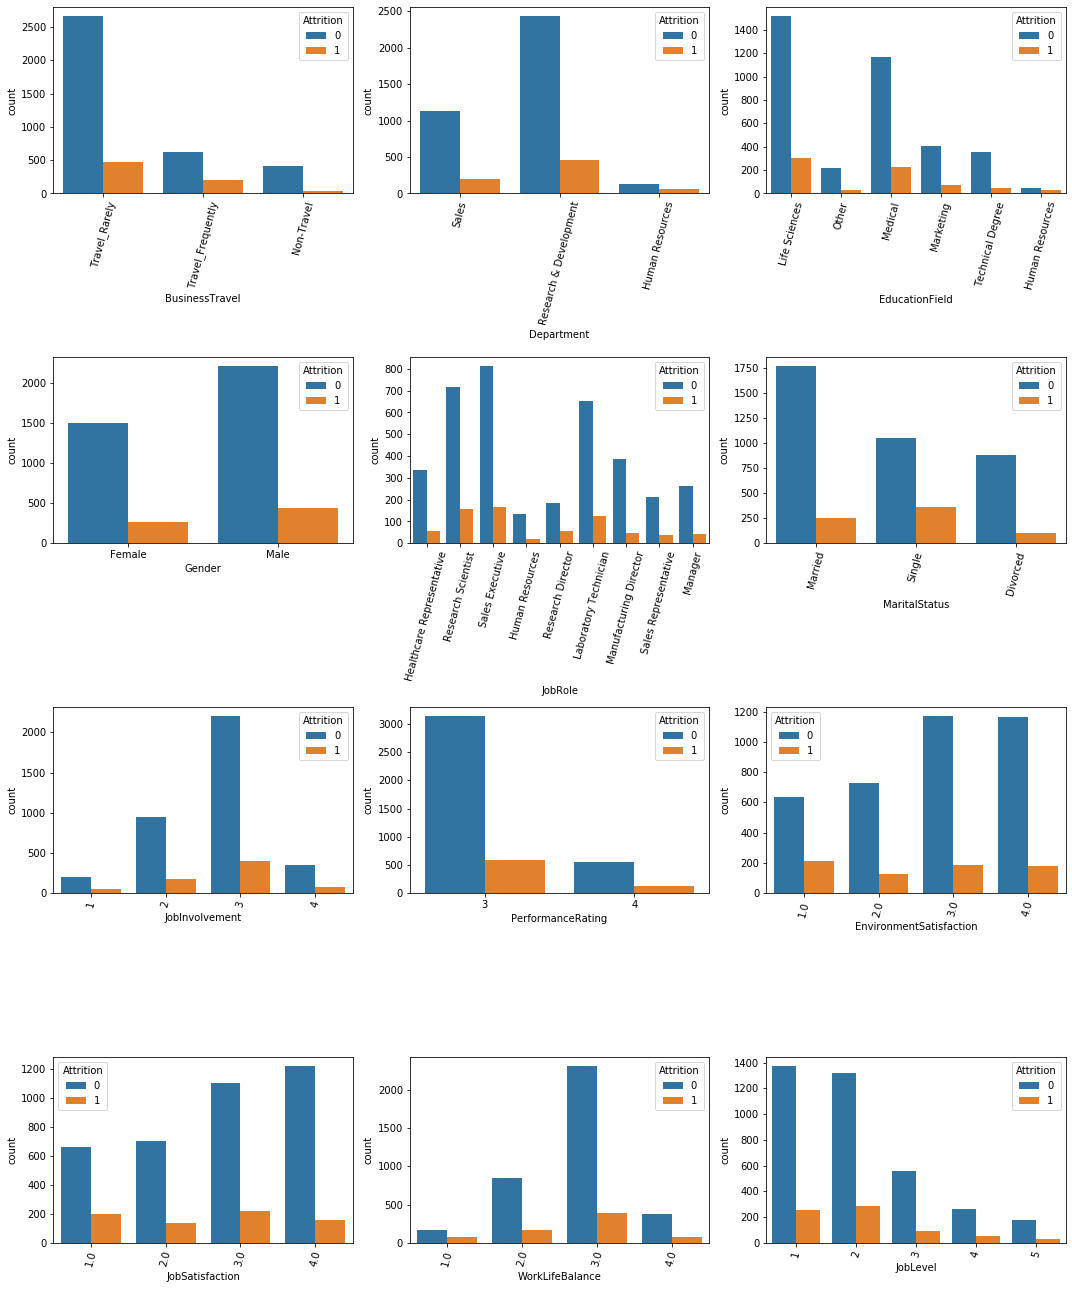

In [46]:
cat_cols = ['BusinessTravel', 'Department','EducationField', 'Gender',
       'JobRole', 'MaritalStatus','JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'JobLevel']
plt.figure(figsize=(15,18))
for i in range(len(cat_cols)):
    plt.subplot(4,3,i+1)
    sns.countplot(df[cat_cols[i]], hue=df['Attrition'])
    if len(df[cat_cols[i]].unique()) >= 3:
        plt.xticks(rotation=75)
plt.tight_layout()

In [47]:
def Att_ratio(data, col):
    col_values = data[col].unique()
    print('For',col, ':')
    for index, item in enumerate(col_values):
        ratio = len(df.loc[(df[col] == col_values[index]) & (df['Attrition'] == 1)])/len(df.loc[(df[col] == col_values[index]) & (df['Attrition'] == 0)])
        print('The Attrition ratio(Yes/No) under the category %s is %f' %(item, ratio))
    print('-----------------------------------------------------------------------------------------------')

        

In [48]:
cat_cols = ['BusinessTravel', 'Department','EducationField', 'Gender',
       'JobRole', 'MaritalStatus','JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'JobLevel']
for col in cat_cols:
    Att_ratio(df, col)


For BusinessTravel :
The Attrition ratio(Yes/No) under the category Travel_Rarely is 0.175874
The Attrition ratio(Yes/No) under the category Travel_Frequently is 0.331731
The Attrition ratio(Yes/No) under the category Non-Travel is 0.086957
-----------------------------------------------------------------------------------------------
For Department :
The Attrition ratio(Yes/No) under the category Sales is 0.176781
The Attrition ratio(Yes/No) under the category Research & Development is 0.186420
The Attrition ratio(Yes/No) under the category Human Resources is 0.431818
-----------------------------------------------------------------------------------------------
For EducationField :
The Attrition ratio(Yes/No) under the category Life Sciences is 0.200000
The Attrition ratio(Yes/No) under the category Other is 0.138889
The Attrition ratio(Yes/No) under the category Medical is 0.192802
The Attrition ratio(Yes/No) under the category Marketing is 0.186567
The Attrition ratio(Yes/No) under

In [49]:
df['Gender'].replace({'Female': 1, 'Male': 0}, inplace=True)
df['BusinessTravel'].replace({'Travel_Rarely': 1,'Travel_Frequently':2,'Non-Travel':0 }, inplace=True)
cat_cols = ['Gender','BusinessTravel',
       'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'JobLevel']
for col in cat_cols:
    print('The Attrition ration(Yes/All) For',col+':')
    print(df.groupby([col]).Attrition.agg(['mean']))
    print('----------------------------------------------------------')


The Attrition ration(Yes/All) For Gender:
            mean
Gender          
0       0.166667
1       0.153061
----------------------------------------------------------
The Attrition ration(Yes/All) For BusinessTravel:
                    mean
BusinessTravel          
0               0.080000
1               0.149569
2               0.249097
----------------------------------------------------------
The Attrition ration(Yes/All) For JobInvolvement:
                    mean
JobInvolvement          
1               0.216867
2               0.160000
3               0.153226
4               0.180556
----------------------------------------------------------
The Attrition ration(Yes/All) For PerformanceRating:
                       mean
PerformanceRating          
3                  0.157556
4                  0.181416
----------------------------------------------------------
The Attrition ration(Yes/All) For EnvironmentSatisfaction:
                             mean
EnvironmentSatisfacti

# summary of the categorical variables:
* BusinessTravel seems to have a bit of an influence on attrition.those who travel frequently have an attrition ratio of 0.331731 - Probably those who travel a lot for business purposes are having more stress and thus willing to leave


* Department doesn't seem to be correlated strongly but Human Resources attrition ratio is quite high at 0.431818 - maybe that's because of the low salary, we'll check this one later 


* EducationField seems to be a related to Department in some way, for Human Resources the ratio is 0.687500


* Gender doesn't seem correlated - Male attrition ratio is 0.200000 - not significantly more than females


* JobRole - the attrition ratio for Research Director is 0.311475 - that's not surprising considering the fact that the largest department is Research and Development. Research director is a role with a lot of responsibility,and that definetely can contribute to the the overall fatigue and burnout.


* MaritalStatus - Single status has a slightly bigger ratio with 0.342857 - maybe mediated by low salary/short term job


* JobInvolvement - category 1 ratio is 0.276923 - not surprising but isn't much higher than the other categories


* PerformanceRating - category 4 ratio 0.221622 - probably those who work the hardest, but again no significantly higher


* EnvironmentSatisfaction - here the difference is quite big, the category 1.0 attrition ratio is 0.339117 - it's pretty normal in my opinion. those who aren't satisfied with their work are not going to stay for long


* JobSatisfaction - category 1.0 ratio is 0.297134 - same explanation but here it's not significantly higher in my opinion


* WorkLifeBalance - here, simillarly to enviroment satisfaction, the gap is quite big, for category 1.0 the ratio is 0.457317 - the reasonable explanation is that people with low work/life balance are strongly prone to burnout, have more stress, etc..


* JobLevel - category 2 ratio 0.216401 - very simillar to other categories therefore doesn;t have a strong impact.

## Let's move on to the numerical variables:
### We'll start with income, then the Age and the seniority
### We'll check if there's any correlation between those variables and the prone to leave

In [50]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,avg_in,avg_out,med_in,med_out,total
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,51,0,1,Sales,6,2,Life Sciences,1,1,Healthcare Representative,...,3,3,3.0,4.0,2.0,9.79,17.15,9.59,17.23,7.64
2,31,1,2,Research & Development,10,1,Life Sciences,1,1,Research Scientist,...,2,4,3.0,2.0,4.0,9.78,17.47,9.58,17.43,7.85
3,32,0,2,Research & Development,17,4,Other,0,4,Sales Executive,...,3,3,2.0,2.0,1.0,9.83,16.80,10.02,17.01,6.99
4,38,0,0,Research & Development,2,5,Life Sciences,0,3,Human Resources,...,2,3,4.0,4.0,3.0,9.77,16.95,9.58,17.11,7.53
5,32,0,1,Research & Development,10,1,Medical,0,1,Sales Executive,...,3,3,4.0,1.0,3.0,9.78,17.77,9.58,17.59,8.01


In [51]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'avg_in', 'avg_out', 'med_in', 'med_out', 'total'],
      dtype='object')

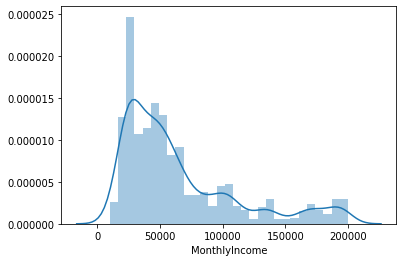

In [52]:
sns.distplot(df.MonthlyIncome)

#### got some outliers in terms of income. 
### lets check the income correlations with other variables

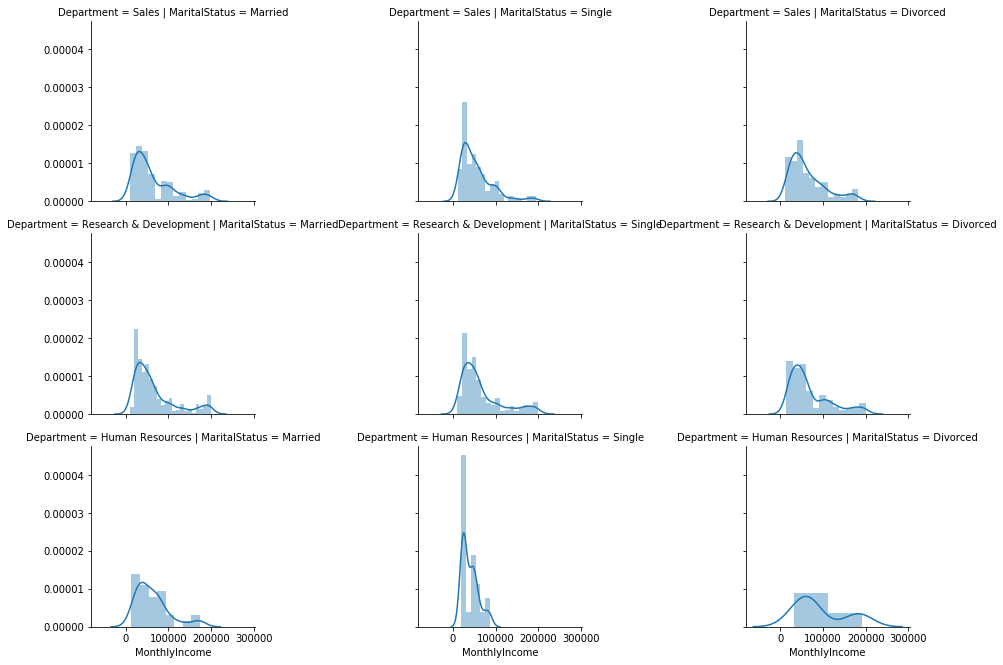

In [53]:
g = sns.FacetGrid(df,col = 'MaritalStatus', row = 'Department')
g = g.map(sns.distplot , 'MonthlyIncome')
g.fig.subplots_adjust(top=1,right=1.4, wspace=1)


#### * seems like, as i hypothesised earlier, that single workers are paid the least.

#### * we can also notice that divorced people are paid the most, regardless of department.

#### * doesn't seem like there is a clear connection between department and salary

In [54]:
## we can see it here as well, it's more useful to look at the median, as the distribution of income is skewed to the right
print(df.groupby(['MaritalStatus']).MonthlyIncome.agg(['mean','median']))
print(df.groupby(['Department']).MonthlyIncome.agg(['mean','median']))


                       mean  median
MaritalStatus                      
Divorced       68009.724771   52090
Married        66063.328380   48980
Single         61475.085106   46875
                                mean  median
Department                                  
Human Resources         57904.444444   47590
Research & Development  67187.960458   50330
Sales                   61384.484305   47060


In [55]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'avg_in', 'avg_out', 'med_in', 'med_out', 'total'],
      dtype='object')

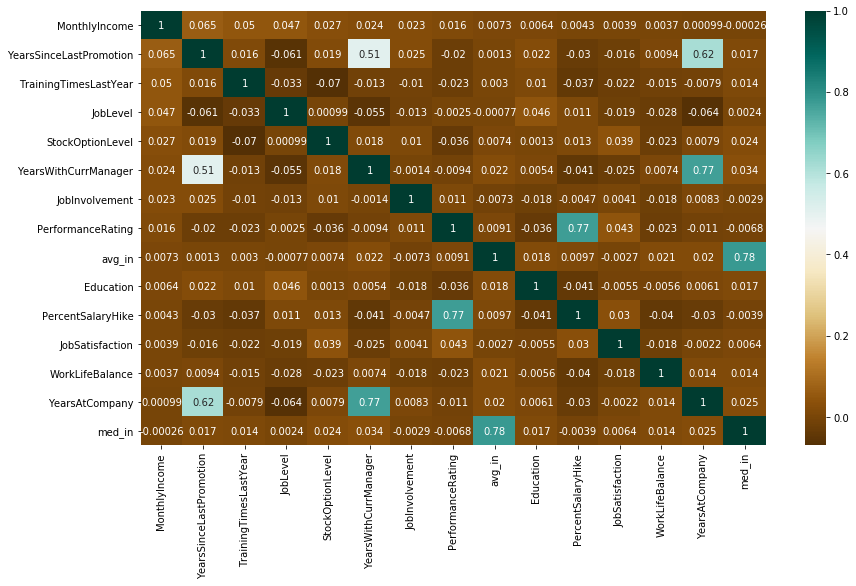

In [56]:
plt.figure(figsize=(14,8))
top_corr = df.corr().nlargest(15, 'MonthlyIncome').index
cm = np.corrcoef(df[top_corr].values.T)
g = sns.heatmap(cm, cbar=True, annot=True, cmap='BrBG',yticklabels = top_corr.values, xticklabels=top_corr.values)

#### No real connection between salary and any other numerical value
### let's have a look at the connection between attrition and salary

,mean,median
Attrition,,
0,65672.595296,49300
1,61682.616034,49080


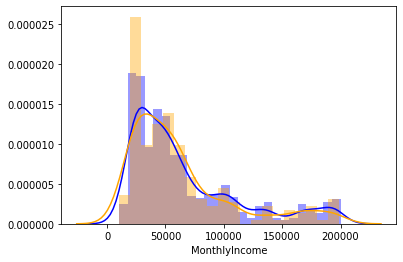

In [57]:
g = sns.distplot(df['MonthlyIncome'][df['Attrition'] == 0],color='blue')
f = sns.distplot(df['MonthlyIncome'][df['Attrition'] == 1],color='orange')
df.groupby('Attrition').MonthlyIncome.agg(['mean','median'])


#### from looking at the graph and the table there's seem to be no correlation whatsoever between salary and attrition

### let's take a look at the age, the years from last promotion and years at the company

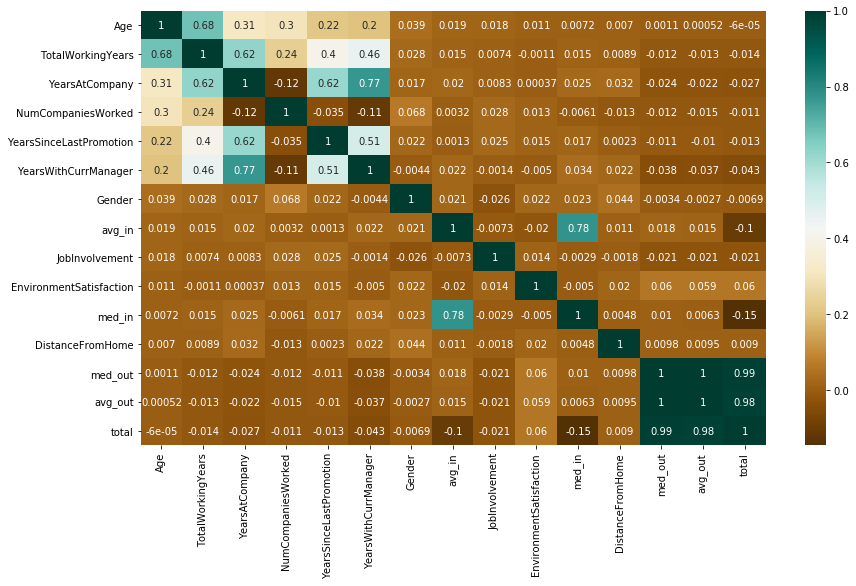

In [58]:
plt.figure(figsize=(14,8))
top_corr = df.corr().nlargest(15, 'Age').index
cm = np.corrcoef(df[top_corr].values.T)
g = sns.heatmap(cm, cbar=True, annot=True, cmap='BrBG',yticklabels = top_corr.values, xticklabels=top_corr.values)

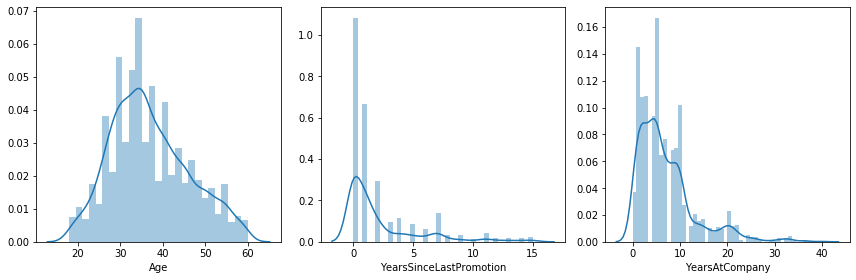

In [59]:
fig, axs = plt.subplots(1,3, figsize = (12,4))
sns.distplot(df['Age'], ax=axs[0])
sns.distplot(df['YearsSinceLastPromotion'], ax=axs[1])
sns.distplot(df['YearsAtCompany'], ax=axs[2])
plt.tight_layout()

### quite normal distributed ages.

### skewd to the right distribution of total years at the company

### skewd to the right distribution of years since last promotion

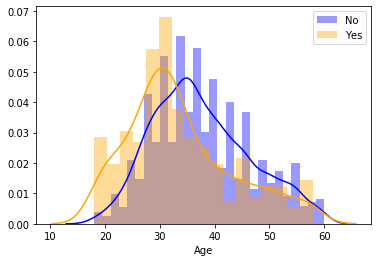

In [60]:
sns.distplot(df['Age'][df['Attrition'] == 0],color='blue')
sns.distplot(df['Age'][df['Attrition'] == 1],color='orange')
plt.legend(['No','Yes'])

,median,mean
Attrition,,
0,36,37.561233
1,32,33.607595


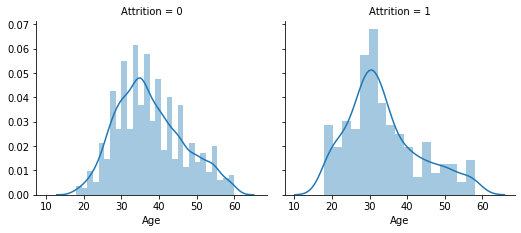

In [61]:
g = sns.FacetGrid(df,col = 'Attrition')
g = g.map(sns.distplot , 'Age')
g.fig.subplots_adjust(top=1,right=1.2)
#plt.tight_layout()
df.groupby('Attrition').Age.agg(['median','mean'])

seems like a tendency to attrit among younger people,that's interesting. mayber thats because they work longer hours. let's check that

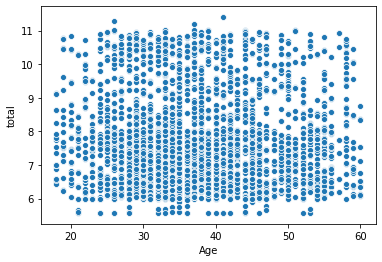

In [62]:
sns.scatterplot(df['Age'], df['total'])

### doesn't seem like that's the case. probably related to other things like more stress, need to prove yourself etc...

,median,mean
Attrition,,
0,1,2.234388
1,1,1.945148


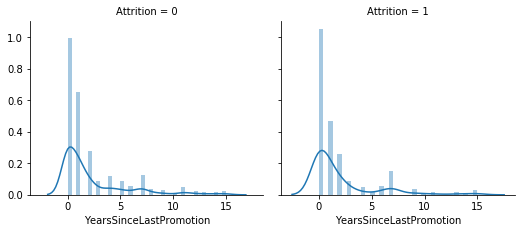

In [63]:
g = sns.FacetGrid(df,col = 'Attrition')
g = g.map(sns.distplot , 'YearsSinceLastPromotion')
g.fig.subplots_adjust(top=1,right=1.2)
df.groupby('Attrition').YearsSinceLastPromotion.agg(['median','mean'])

,median,mean
Attrition,,
0,3,4.367397
1,2,2.852321


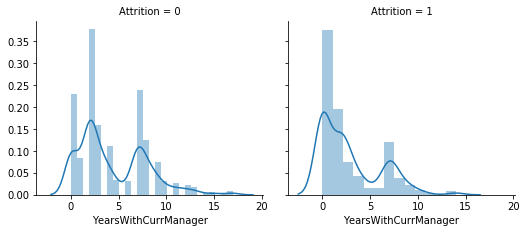

In [64]:
g = sns.FacetGrid(df,col = 'Attrition')
g = g.map(sns.distplot , 'YearsWithCurrManager')
g.fig.subplots_adjust(top=1,right=1.2)
df.groupby('Attrition').YearsWithCurrManager.agg(['median','mean'])

,median,mean
Attrition,,
0,6,7.369019
1,3,5.130802


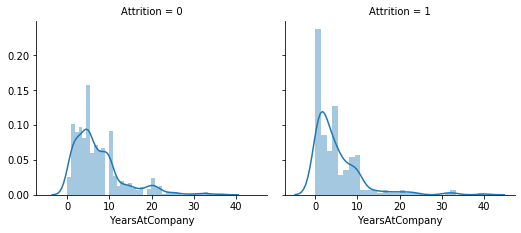

In [65]:
g = sns.FacetGrid(df,col = 'Attrition')
g = g.map(sns.distplot , 'YearsAtCompany')
g.fig.subplots_adjust(top=1,right=1.2)
df.groupby('Attrition').YearsAtCompany.agg(['median','mean'])

,median,mean
Attrition,,
0,7,9.227088
1,7,9.012658


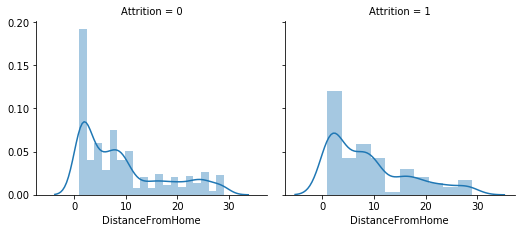

In [66]:
g = sns.FacetGrid(df,col = 'Attrition')
g = g.map(sns.distplot , 'DistanceFromHome')
g.fig.subplots_adjust(top=1,right=1.2)
df.groupby('Attrition').DistanceFromHome.agg(['median','mean'])


,median,mean
Attrition,,
0,10.0,11.838335
1,7.0,8.232068


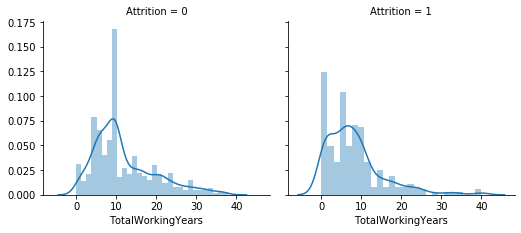

In [67]:
g = sns.FacetGrid(df,col = 'Attrition')
g = g.map(sns.distplot , 'TotalWorkingYears')
g.fig.subplots_adjust(top=1,right=1.2)
df.groupby('Attrition').TotalWorkingYears.agg(['median','mean'])

,median,mean
Attrition,,
0,3,2.919708
1,3,2.877637


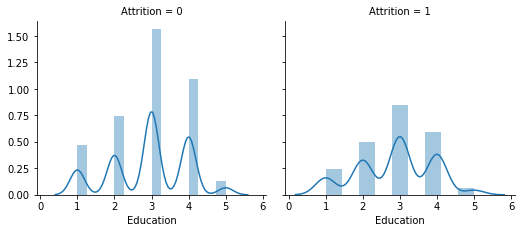

In [68]:
g = sns.FacetGrid(df,col = 'Attrition')
g = g.map(sns.distplot , 'Education')
g.fig.subplots_adjust(top=1,right=1.2)
df.groupby('Attrition').Education.agg(['median','mean'])

,median,mean
Attrition,,
0,14,15.157340
1,14,15.481013


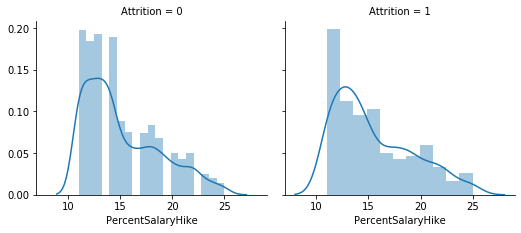

In [69]:
g = sns.FacetGrid(df,col = 'Attrition')
g = g.map(sns.distplot , 'PercentSalaryHike')
g.fig.subplots_adjust(top=1,right=1.2)
df.groupby('Attrition').PercentSalaryHike.agg(['median','mean'])

,median,mean
Attrition,,
0,2.0,2.637740
1,1.0,2.919831


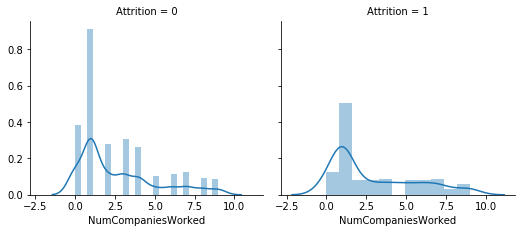

In [70]:
g = sns.FacetGrid(df,col = 'Attrition')
g = g.map(sns.distplot , 'NumCompaniesWorked')
g.fig.subplots_adjust(top=1,right=1.2)
df.groupby('Attrition').NumCompaniesWorked.agg(['median','mean'])

,median,mean
Attrition,,
0,1,2.234388
1,1,1.945148


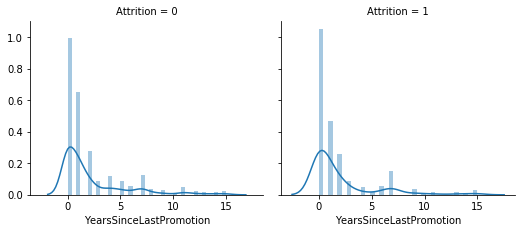

In [71]:
g = sns.FacetGrid(df,col = 'Attrition')
g = g.map(sns.distplot , 'YearsSinceLastPromotion')
g.fig.subplots_adjust(top=1,right=1.2)
df.groupby('Attrition').YearsSinceLastPromotion.agg(['median','mean'])

,median,mean
Attrition,,
0,1,0.796431
1,1,0.780591


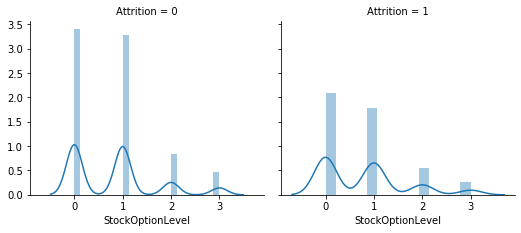

In [72]:
g = sns.FacetGrid(df,col = 'Attrition')
g = g.map(sns.distplot , 'StockOptionLevel')
g.fig.subplots_adjust(top=1,right=1.2)
df.groupby('Attrition').StockOptionLevel.agg(['median','mean'])

## Summary of the numerical variables:

* Looks like seniority plays somewhat of a role in the attrition attribute, along with total working years and years at the company, though there is a strong correlation beteen age and total working years, as well as total working years and years at the company, therefore there's a risk for multicolinearity. we'll handle it when we get to the model building.


* No observed impact among all the other variables on attrition.

# Modeling:
### 0) A little more feature engineering like creating age groups
### 1) seperating x and y
### 2) convert strings to dummy variables
### 3) scale x features
### 4) compare scores of different models and select the two best
### 5) perform search grid on the two best models and see if there's an improvement

Lets first drop some unimportant features and variables with multicolinearity such as med_in avg_in and total etc

In [73]:
x = df.drop(['Attrition'], axis=1).reset_index(drop=True)
y = df['Attrition'].values

In [74]:
cols_todrop = ['JobLevel','Department','JobRole','NumCompaniesWorked','PercentSalaryHike','StockOptionLevel','YearsWithCurrManager','med_in', 'avg_in','avg_out']

In [75]:
x.drop(cols_todrop, axis=1, inplace=True)

In [76]:
## creating age groups
x.Age = pd.cut(x.Age, 4)

In [77]:
x.Age.unique()

[(49.5, 60.0], (28.5, 39.0], (39.0, 49.5], (17.958, 28.5]]
Categories (4, interval[float64]): [(17.958, 28.5] < (28.5, 39.0] < (39.0, 49.5] < (49.5, 60.0]]

In [78]:
## converting categorial variables to dummies
x = pd.get_dummies(x)

In [79]:
x_copy = x.copy()

In [80]:
## scaling the features

scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(x)


In [81]:
x_copy.head()

,BusinessTravel,DistanceFromHome,Education,Gender,MonthlyIncome,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,JobInvolvement,...,"Age_(49.5, 60.0]",EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,6,2,1,131160,1.0,6,1,0,3,...,1,0,1,0,0,0,0,0,1,0
1,2,10,1,1,41890,6.0,3,5,1,2,...,0,0,1,0,0,0,0,0,0,1
2,2,17,4,0,193280,5.0,2,5,0,3,...,0,0,0,0,0,1,0,0,1,0
3,0,2,5,0,83210,13.0,5,8,7,2,...,0,0,1,0,0,0,0,0,1,0
4,1,10,1,0,23420,9.0,2,6,0,3,...,0,0,0,0,1,0,0,0,0,1


In [82]:
## splitting the sets into train and test

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state=42)

## Alright we are ready to start with the predictions!

### As I've mentionted above, our working process is :
* Compare


* Select


* Improve


* Check the contribution of the features

# Model Comparison

In [95]:
# Defining a function which examines each model based on the score, then show each one's score and STD, as well as graphic comparison
# evaluate each model in turn
def get_scores(score1, score2):
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC()))
    models.append(('ADA', AdaBoostClassifier()))
    models.append(('GradientBooster', GradientBoostingClassifier()))
    models.append(('ExtraTrees', ExtraTreesClassifier()))
    models.append(('RandomForest', RandomForestClassifier()))
    cv_scores = []
    test_scores = []
    names = []
    stds = []
    differences = []
    #res = pd.DataFrame(columns = {'Model',score+('(train)'), 'Std', score+('(test_score)'), 'difference'})
    #res = res[['Model',score+('(train)'), 'Std', score+('(test_score)'), 'difference']]
    res = pd.DataFrame()
    for index, model in enumerate(models):
        kfold = StratifiedKFold(n_splits=7)
        cv_results = cross_val_score(model[1], x_train, y_train, cv=kfold, scoring=score1)
        cv_scores.append(cv_results)
        names.append(model[0])
        model[1].fit(x_train,y_train)
        predictions = model[1].predict(x_test)
        test_score = score2(predictions, y_test)
        test_scores.append(test_score)
        stds.append(cv_results.std())
        differences.append((cv_results.mean() - test_score))
        res.loc[index,'Model'] = model[0]
        res.loc[index,score1+('(train)')] = cv_results.mean()
        res.loc[index,score1+('(test_score)')] = test_score
        res.loc[index,'Std'] = cv_results.std()
        res.loc[index,'difference'] = cv_results.mean() - test_score
    # boxplot algorithm comparison
    fig = plt.figure(figsize = (12,5))
    fig.suptitle('Model Comparison')
    ax = fig.add_subplot(121)
    plt.boxplot(cv_scores)
    ax.set_xticklabels(names, rotation=70)
    axs = fig.add_subplot(122)
    sns.barplot(names,test_scores)
    axs.set_xticklabels(names, rotation=70)
    plt.tight_layout(pad=5)
    return res
    plt.show()

    


,Model,accuracy(train),accuracy(test_score),Std,difference
0,LR,0.849368,0.863946,0.010899,-0.014577
1,LDA,0.846453,0.863190,0.009444,-0.016737
2,KNN,0.830256,0.817838,0.009953,0.012418
3,CART,0.950437,0.956160,0.011526,-0.005723
4,NB,0.819890,0.806500,0.012588,0.013389
5,SVM,0.891480,0.904006,0.008860,-0.012526
6,ADA,0.855523,0.869992,0.009047,-0.014469
7,GradientBooster,0.891156,0.907029,0.007761,-0.015873
8,ExtraTrees,0.975381,0.984127,0.005991,-0.008746
9,RandomForest,0.970522,0.979592,0.005813,-0.009070


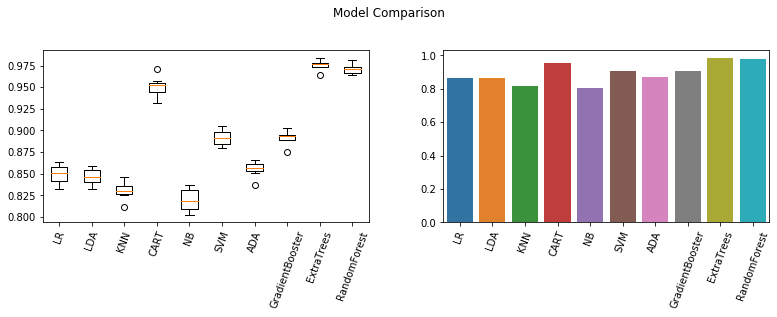

In [106]:
get_scores('accuracy', accuracy_score)

# Model Selection And Tuning
### seems like our models has a strong predicting power, especially the random forest and extra tree booster. let's check if theres any way  to improve them with random search cv

In [101]:
params = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}
RandomForest = RandomForestClassifier()
randomgrid_forest = RandomizedSearchCV(estimator=RandomForest, param_distributions = params, 
                               cv=5, n_iter=25, scoring = 'accuracy',
                               n_jobs = 4, verbose = 3, random_state = 42,
                               return_train_score = True)
randomgrid_forest.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   28.5s
[Parallel(n_jobs=4)]: Done 125 out of 125 | elapsed:  3.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [102]:
randomgrid_forest.score(x_test, y_test)

0.9863945578231292

In [117]:
forest_preds = randomgrid_forest.predict(x_test)
roc_auc_score(forest_preds, y_test)

0.9856921029281278

In [116]:
randomgrid_forest.best_estimator_

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### A little bit of improvement indeed! let's try tuning it a little bit more

In [104]:
### I created a function which take a model and scoring method, then shows the cross validation score for each estimator
### and plot it next to the test score.
def estimators_compare(model, cv_score, metrics_score):
    train_scores = []
    test_scores= []
    estimators = [80,100,200,400,600,800,1200]
    res = pd.DataFrame(columns = {'Number Of Estimators', 'train_score', 'test_score'})
    for ind, i in enumerate(estimators):
        mode = model(n_estimators=i)
        kfold = StratifiedKFold(n_splits=7)
        cv_results = cross_val_score(mode, x_train, y_train, cv=kfold, scoring=cv_score)
        mode.fit(x_train, y_train)
        predictions = mode.predict(x_test)
        train_score = cv_results.mean()
        train_scores.append(train_score)
        test_score = metrics_score(predictions, y_test)
        test_scores.append(test_score)
        res.loc[ind,'Number Of Estimators'] = i
        res.loc[ind,'train_score'] = train_score
        res.loc[ind,'test_score'] = test_score

    plt.plot(estimators, train_scores, color='red')
    plt.plot(estimators, test_scores, color='blue')
    legs = ['train', 'test']
    plt.legend(legs)
    return res

,train_score,test_score,Number Of Estimators
0,0.970845,0.975813,80
1,0.968578,0.980348,100
2,0.96955,0.975813,200
3,0.972141,0.978836,400
4,0.971817,0.978836,600
5,0.972465,0.979592,800
6,0.971169,0.978836,1200


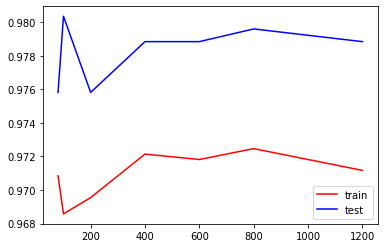

In [105]:
estimators_compare(RandomForestClassifier, 'accuracy', accuracy_score)

### let's compare 100 estimators with 600 like the grid search provided

In [107]:
final_random_forest = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
final_random_forest.fit(x_train, y_train)
final_random_forest.score(x_test, y_test)

0.983371126228269

### Well, Looks like our randomized grid search produced a slightly better results. before we move on to the extra trees, let's have a look at the contribution of each feature to our prediction

In [108]:
featuers_coefficients = final_random_forest.feature_importances_.tolist()
feature_names = x_copy.columns
feats = pd.DataFrame(pd.Series(featuers_coefficients, feature_names).sort_values(ascending=False),columns=['Coefficient'])
feats

,Coefficient
med_out,0.101722
MonthlyIncome,0.094801
TotalWorkingYears,0.093940
total,0.085933
YearsAtCompany,0.078034
DistanceFromHome,0.068624
EnvironmentSatisfaction,0.047698
YearsSinceLastPromotion,0.041973
JobSatisfaction,0.040716
TrainingTimesLastYear,0.039029


## same process for the Extra Trees model

In [109]:
params2 = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}
ExtraTress = ExtraTreesClassifier()
randomgrid_extrees = RandomizedSearchCV(estimator=ExtraTress, param_distributions = params2, 
                               cv=5, n_iter=25, scoring = 'accuracy',
                               n_jobs = 4, verbose = 3, random_state = 42,
                               return_train_score = True)
randomgrid_extrees.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   21.0s
[Parallel(n_jobs=4)]: Done 125 out of 125 | elapsed:  2.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=ExtraTreesClassifier(bootstrap=False,
                                                  ccp_alpha=0.0,
                                                  class_weight=None,
                                                  criterion='gini',
                                                  max_depth=None,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  max_samples=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                        

In [110]:
randomgrid_extrees.score(x_test, y_test)

0.983371126228269

In [112]:
randomgrid_extrees.best_estimator_

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=40, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=600,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

,train_score,test_score,Number Of Estimators
0,0.976029,0.981104,80
1,0.974085,0.984883,100
2,0.975057,0.983371,200
3,0.974409,0.984883,400
4,0.976029,0.983371,600
5,0.976029,0.984127,800
6,0.975057,0.983371,1200


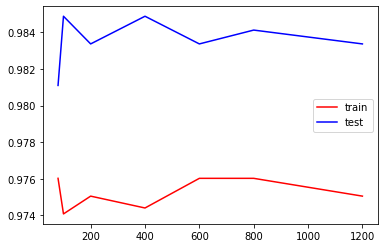

In [111]:
estimators_compare(ExtraTreesClassifier, 'accuracy', accuracy_score)

Let's go with 100 estimators!

In [114]:
final_extra_trees = ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=40, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)
final_extra_trees.fit(x_train, y_train)
final_extra_trees.score(x_test, y_test)


0.981103552532124

#### again, our random grid search had it on point when combining the parameters together. let's check the coefficients than wrap it up.

In [115]:
featuers_coefficients = final_extra_trees.feature_importances_.tolist()
feature_names = x_copy.columns
feats = pd.DataFrame(pd.Series(featuers_coefficients, feature_names).sort_values(ascending=False),columns=['Coefficient'])
feats

,Coefficient
med_out,0.074896
TotalWorkingYears,0.066224
YearsAtCompany,0.061713
total,0.056253
JobSatisfaction,0.055356
MonthlyIncome,0.053957
DistanceFromHome,0.052696
EnvironmentSatisfaction,0.051025
WorkLifeBalance,0.047063
TrainingTimesLastYear,0.044819
